# Konstitutivní zákony

Konstitutivní zákony jsou zákony definující vztah mezi stavovou veličinou a jejím tokem. Můžeme si představit například teplotu a tok tepla. Tato představa je nejnázornjěší, ale mohla by být matoucí, protože teplota je intenzivní veličina a veličina, které se přesunuje tokem, není teplota, ale energie. Proto si místo toho můžeme představit i něco jiného. Nabízí se například množství vody. Pokud volíme pomalu tekoucí vodu, představme si například vodu v prostředí, ve kterém se může pohybovat, ale tento pohyb je pomalý. Nejčastěji si jako konkrétní model představujeme vlhkostní pole ve dřevě, nebo hladinu podzemní vody v půdě. To by pro nás mohly být vhodné materiálové realizace obecných myšlenek. 

Tok přenášené veličiny souvisí s tím, jak nerovnoměrně je rozložena tato veličina v prostoru. Pokud je množství veličiny ve všech bodech stejné, k toku nedochází. (V přípatě teploty, která je intenzivní veličinou, pochopitelně nemluvíme o množství teploty v bodě, ale o teplotě v bodě. U množství vody v bodě máme na mysli hustotu vody, tj. obsah vody v jednotce objemu, jednotce plochy nebo jednotce délky, podle dimenzionality úlohy.)

* Pokud mají všechny části tělesa stejnou teplotu, nedochází v tělese k toku tepla. Nemůže se část tělesa samovolně ohřát a druhá ochladit.
* Pokud mají všechny části tělesa stejný obsah vody, nedochází v tělese k přenosu vody difuzním tokem. Voda se samovolně nezačne koncentrovat v jednom místě více, než v místě jiném.

Pro pochopení souvislosti mezi stavovou veličinou a jejím tokem nejprve musíme mít míru udávající nerovnoměrnost rozložení stavové veličiny v prostoru. To bude veličina měřící intenzitu podnětu, který spouští tok.

## Gradient

Gradient skalární funkce dvou proměnných $f(x,y)$ je vektorové pole označené a definované vztahem 
$$\nabla f=\begin{pmatrix}\frac{\partial f}{\partial
  x}\cr \frac{\partial f}{\partial y}\end{pmatrix}.$$

Gradient skalární veličiny $f$ je vektorová veličina, která vyjadřuje směr a intenzitu maximálního růstu veličiny $f$. Přesněji, výsledkem gradientu je vektor ve směru maximálního růstu veličiny $f$. Délka tohoto vektoru je nárůst veličiny $f$ na intervalu jednotkové délky. Pro rovnoměrně rozloženou veličinu  v prostoru (konstantní) je gradient nulový. Proto je možné gradient chápat jako míru nerovnoměrného rozložení veličiny v prostoru. Řada fyzikálních dějů probíhá tak, že tato nerovnoměrnost vyvolá proudění, které se snaží tuto nerovnoměrnost vyrovnat, například vedení tepla nebo difuze. V praxi nás proto většinou zajímá směr maximálního poklesu, tj. $-\nabla f$.

Pokud je gradient teploty v rovině v bodě $(1,1)$ dán vektorem  $$\nabla T(1,1)=\begin{pmatrix}1 \cr -2\end{pmatrix}{}^{\circ}\mathrm C \mathrm m^{-1}, $$  znamená to, že v tomto bodě roste teplota ve směru osy $x$ rychlostí $1$ stupeň Celsia na každý metr délky a ve směru osy $y$ klesá rychlostí $2$ stupně Celsia na každý metr délky. Vektor definovaný tímto gradientem má směr doprava dolů (pod úhlem splňujícím podmínku $\tan \varphi = -2$) a délku $\sqrt{(1)^2+(-2)^2}=\sqrt 5\approx 2.2$. To znamená, že maximální nárůst teploty je směrem doprava dolů a tento nárůst je $2.2$ stupně Celsia na každý metr délky. Nakreslíme si rozložení teploty a gradient. Všímejme si, že šipky míří vždy směrem, kterým nejrychleji roste teplota, což poznáme podle barev na "termosnímku". Tento termosnímek můžeme chápat tak, že deska je uprostřed ochlazována tak, že teplota rovnoměrně klesá k nule. (Pro rovnoměné ochlazování nestačí mít uprostřed chladič na nulovu teplotu. To by tok nekledal rovnoměrně. Je nutné rozmístit po desce chladiče přesně napočítaného výkonu tak, aby pokles byl rovnoměrný. Jak takový výkon napočítat se dozvíme studiem difuzní rovnice a rovnice vedení tepla.)







In [2]:
import numpy                     # knihovna na numerické výpočty (goniomerické funkce, gradient, 2D mřížka a dělení intervalu, ...)
import scipy.integrate           # knihovna na technické výpočty (integrál)
import matplotlib.pyplot as plt  # knihovna na kreslení

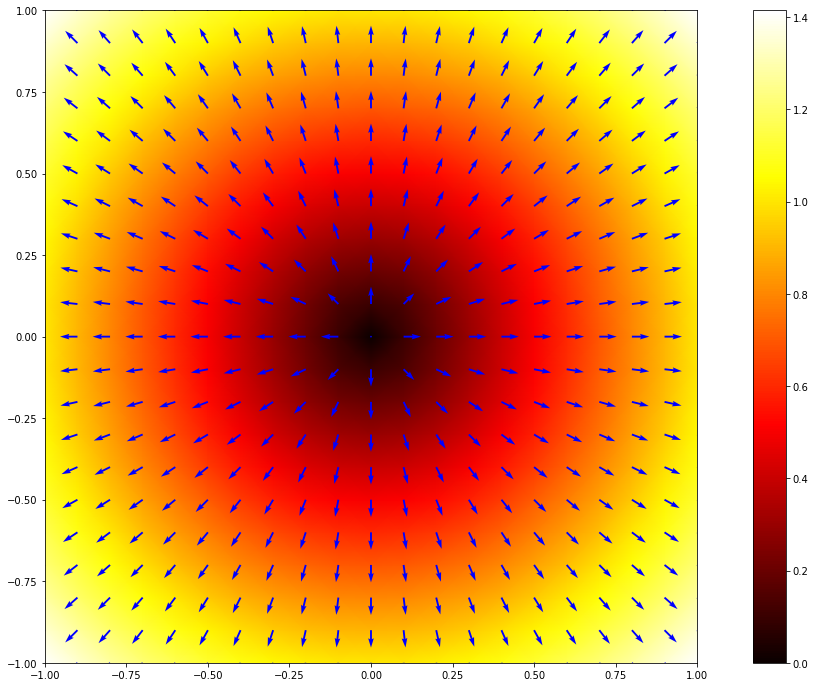

In [3]:
def teplota (x,y): 
  return numpy.sqrt(x**2+y**2)

y, x = numpy.mgrid[-1:1:21j, -1:1:21j]        # mrizka pro kresleni gradientu a barevne mapy funkce dvou promennych
z = teplota(x, y)                             # výpočet teploty na mřížce
grady, gradx = numpy.gradient(z)              # gradient teploty

fig, ax = plt.subplots(1,1, figsize=(20,12))  # inicializace grafiky

## Vykreslení teploty a gradientu teploty
cmap = plt.get_cmap('hot')                     # nastaveni schema pro barevnou mapu
output = plt.pcolormesh(x, y, z, cmap=cmap, shading='gouraud') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output)                           # barevný sloupec s hodnotami vedle grafu
plt.quiver(x, y, gradx, grady, color='blue')   # vykreslení toku
ax.set_aspect(1) 
None


## Tok v izotropním materiálu (keramika, kov)

Nerovnoměrnost v rozložení teploty popsaná v předchozím odstavci bude tvořit hnací faktor snažící se hnát teplo opačným směrem. Bude to opravdu směr toku? Pokud bude materiál izotropní (bude mít ve všech směrech stejné vlastnosti), jako například kov nebo keramika, je odpověď na tuto otázku kladná. Teplo bude mít tendenci téct na opačnou stranu, doleva nahoru. Jak intenzivní tok tepla bude závisí na materiálu. Jinak to dopadne pro měď a jinak pro keramiku. Může to dopadnout například takto.





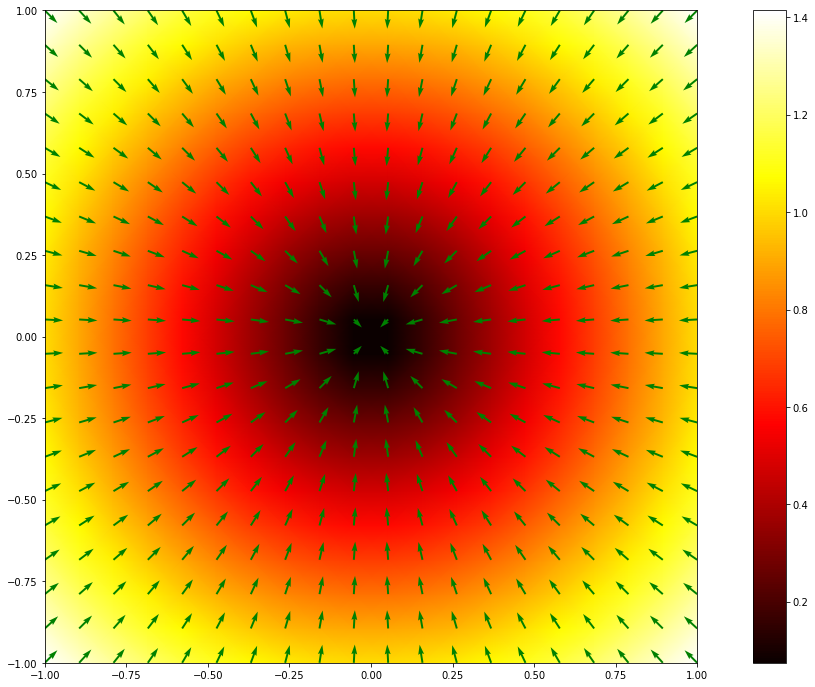

In [23]:
tokx = -gradx
toky = -grady

fig, ax = plt.subplots(1,1, figsize=(20,12))  # inicializace grafiky
plt.quiver(x, y, gradx, grady, color='blue') 
output = plt.pcolormesh(x, y, z, cmap=cmap, shading='gouraud') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output)                           # barevný sloupec s hodnotami vedle grafu
plt.quiver(x, y, tokx, toky, color='green')    # vykreslení toku
#plt.quiver(x, y, gradx, grady, color='lightblue')    # vykreslení gradientu
ax.set_aspect(1) 
None

## Tok v ortotropním materiálu (dřevo)

V ortotorpních a izotrpních materiálech závisí materiálové vlastnosti na směru. Typicky se jedná o materiály, které mají jistou strukturu. Typickým příkladem je dřevo. 

Naopak, materiály, které takovou strukturu nemají a jejich stavební části jsou uspořádány chaoticky, bývají inzotropní. Například kov nebo guma. I v tomto případě však je možné stukturu dodat, čímže se změní vlastnosti materiálu a materiál přestane být izotropní a začne vykazovat v odlišných směrech odůlošné vlasnosti. Například kov válcovaný za studena nebo napnutá guma.

V takových případech je závislost toku $\vec q$ na gradientu $\nabla u$ stavové veličiny $u$ popsána obecnou funkční závislostí $$ \vec q= \vec F (\nabla u),$$
přičemž nulový vektor se zobrazuje na nulový vektor, protože bez podnětu není odezva, tedy $$ \vec F(0)=0,$$ kde nula v tomto případě označuje nulový vektor.








### Lineární aproximace

Připomeňme, jak funguje lineární aproximace pro vektorové funkce. Vyjdeme z aproximace obecné vektorové funkce $\vec F$ se dvěma komponentami $f_1(x,y)$ a $f_2(x,y)$. V okolí boxu $(x_0,y_0)$ je jsou komponenty této funkce aproximovány vztahy
$$      f_1(x,y)\approx f_1(x_0, y_0)+\frac{\partial f_1 (x_0,y_0)}{\partial x}(x-x_0)+\frac{\partial f_1 (x_0,y_0)}{\partial y}(y-y_0)$$
a
$$      f_2(x,y)\approx f_2(x_0, y_0)+\frac{\partial f_2 (x_0,y_0)}{\partial x}(x-x_0)+\frac{\partial f_2 (x_0,y_0)}{\partial y}(y-y_0).$$
Pro nulovou odezvu při nulovém podnětu máme $x_0=y_0=f_1(0,0)=f_2(0,0)=0,$ čímž
dostáváme 
$$      f_1(x,y)\approx \frac{\partial f_1 (0,0)}{\partial x}x+\frac{\partial f_1 (0,0)}{\partial y}y$$
a
$$      f_2(x,y)\approx \frac{\partial f_2 (0,0)}{\partial x}x+\frac{\partial f_2 (0,0)}{\partial y}y.$$
Použitím maticového součinu a Jacobiho matice 
$$J(x,y)=\begin{pmatrix} \frac{\partial f_1}{\partial x}(x ,y ) & \frac{\partial f_1}{\partial y}(x ,y )\cr \frac{\partial f_2}{\partial x}(x ,y ) & \frac{\partial f_2}{\partial y}(x ,y )\end{pmatrix}$$
můžeme tento vztah zapsat jako
$$ \vec F (x,y) \approx J(0,0) \begin{pmatrix} x\cr y\end{pmatrix}.$$
Pokud toto vyjádření použijeme pro gradient, dostáváme
$$ \vec F(\nabla u)\approx - D \nabla u,$$
kde $-D=J(0,0)$ je záporně vzatá Jacobiho matice.

### Tenzorová formulace konstitutivního zákona

Jacobiho matice z předešlého navíc splňuje jisté vztahy, které vyjadřují to, že fyzikální realita je nezávislá na zvolené souřadné soustavě, ve které problém studujeme. Proto se matice, které mají ještě další vlastnosti vyplývající z chování při transformacích, nazývají tenzory. Pomocí nich můžeme konstituvní zákon zapsat ve tvaru $$  \vec q = -D\nabla u,$$
kde $D$ je matice a $u$ stavová veličina. Podle kontextu mají uvedený vztah a matice $D$ speciální název. 

* Například při studiu vedení tepla jde o Fourierův zákon a součinitel tepelné vodivosti. 
* V případě pohybu vody ve dřevě nebo obecně v případě difuze jde o Fickův zákon a difuzní koeficient. 
* V případě pohybu podzemní vody mluvíme o Darcyho zákoně a transmisivitě. 

### Vlastní směry materiálu

U vhodně natočený souřadných os je matice $D$ diagonální. To znamená, že pokud vektor gradientu je směru osy $x$, tok je opět ve směru osy $x$. Skutečně, vektory ve směru osy $x$ mají druhou komponentu nulovou a z maticového součinu plyne 
$$ \begin{pmatrix} D_x & 0 \cr 0 & D_y \end{pmatrix} \begin{pmatrix} \frac{\partial u}{\partial x}  \cr 0 \end{pmatrix} = \begin{pmatrix} D_x\frac{\partial u}{\partial x}  \cr 0 \end{pmatrix} = D_x\begin{pmatrix} \frac{\partial u}{\partial x}  \cr 0 \end{pmatrix}.$$
Podobně pro gradient a tok ve směru osy $y$ máme $$ \begin{pmatrix} D_x & 0 \cr 0 & D_y \end{pmatrix} \begin{pmatrix} 0\cr \frac {\partial u}{\partial y}  \end{pmatrix} =\begin{pmatrix} 0\cr D_y\frac{\partial u}{\partial y}   \end{pmatrix} = D_y \begin{pmatrix} 0\cr \frac{\partial u}{\partial y}   \end{pmatrix}. $$
To znamená, že v těchto směrech je tok proti směru gradientu. V těchto směrech je reakce materiálu určitým způsobem snadněji popsatelná, než v obecném případě, kdy máme $$ \begin{pmatrix} D_x & 0 \cr 0 & D_y \end{pmatrix} \begin{pmatrix} \frac{\partial u}{\partial x}\cr \frac{\partial u}{\partial y}  \end{pmatrix}  = \begin{pmatrix} D_x \frac{\partial u}{\partial x} \cr D_y\frac{\partial u}{\partial y}   \end{pmatrix} $$ a výsledný tok $\begin{pmatrix} D_x \frac{\partial u}{\partial x} \cr D_y\frac{\partial u}{\partial y}   \end{pmatrix}$ má obecně jiný směr než podnět  $\begin{pmatrix} \frac{\partial u}{\partial x} \cr \frac{\partial u}{\partial y}   \end{pmatrix}.$


### Numerický experiment

Zkusíme určit, jaký vliv mají koeficienty difuzní matice na tok. 
Budeme modelovat tok v materiálech popsaných difuzní rovnicí, kde matice je nejprve jednotková a koeficient $D_y$ se postupně zvyšuje na pětinásobek původní hodnoty. Co sledovat?

* Pokud je $D_x=D_y=1$ (první obrázek), jedná se o izotropní materiál. Tok je ve směru klesající stavové veličiny, tj. přesně proti gradientu. Šipky znázorňující tok a gradient míří přesně opačnám směrem. 
* Na dalších obrázcích postupně narůstá tendence materiálu stáčet tok do svislého směru, protože roste $D_y$. Gradient zůstává, ale tok se stáčí do svislého směru.
* Pokud míří gradient vodorovně nebo svisle, tok je proti směru gradientu i v případě odlišných $D_x$ a $D_y$. To je v souladu se závěry předchozího odstavce. Některé směry tedy mají tu vlastnost, že tok je ve směru podnětu. U materiálu s pravidelnou strukturou to jsou směry vyplývající ze této struktury. Například u dřevěné desky uvažované jako 2D materiál by se jednalo o podélný směr a směr k němu kolmý. V ostatních směrech se tok odkldání od směru maximálního poklesu ve prospěch podélného směru dřeva.
* V důsledku uvedeného máme následující pozorování.
  
  * Na prvním obrázku jsou šipky znázorňující gradient a tok přesně naopak. Dále to tak není. 
  * Ve všech obrázcích míří šipky znázorňující tok a gradient proti sobě v případě, že tento směr je vodorovný nebo svislý. Sledujte středy stran čtverců. Na všech obrázcích to vypadá podobně.
  * S výjimkou prvního obrázku je směr šikmých šipek znázorňujících gradient jiný, než směr toku v daném bodě. Tendence odklánět to do svislého směru je tím vyšší, čím je větší nepoměr mezi $D_x$ a $D_y$. Sledujte rohy čtverců. Situace na obrázcích se dramaticky mění. Zelená šipka (tok) se stále více stáčí do svislého směru.


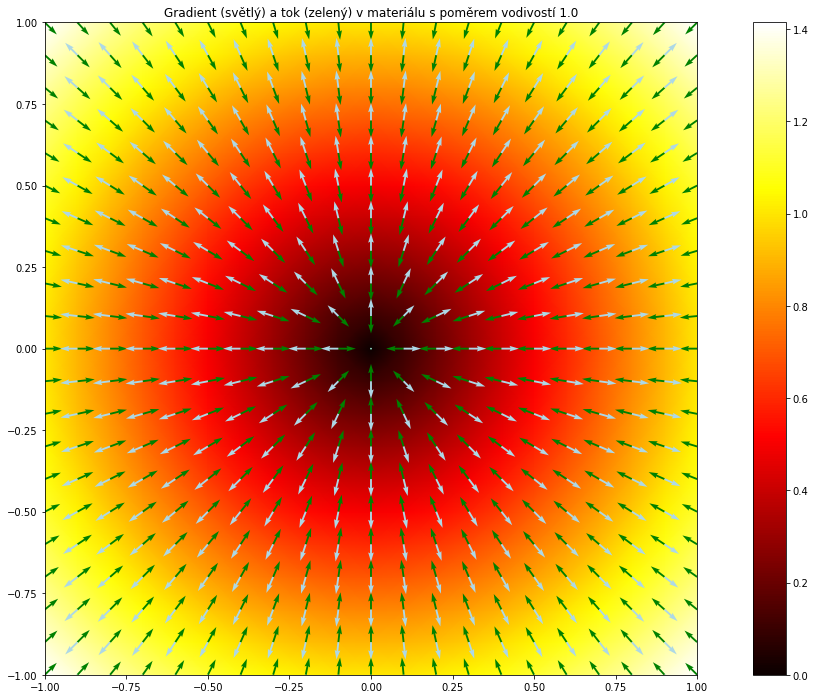

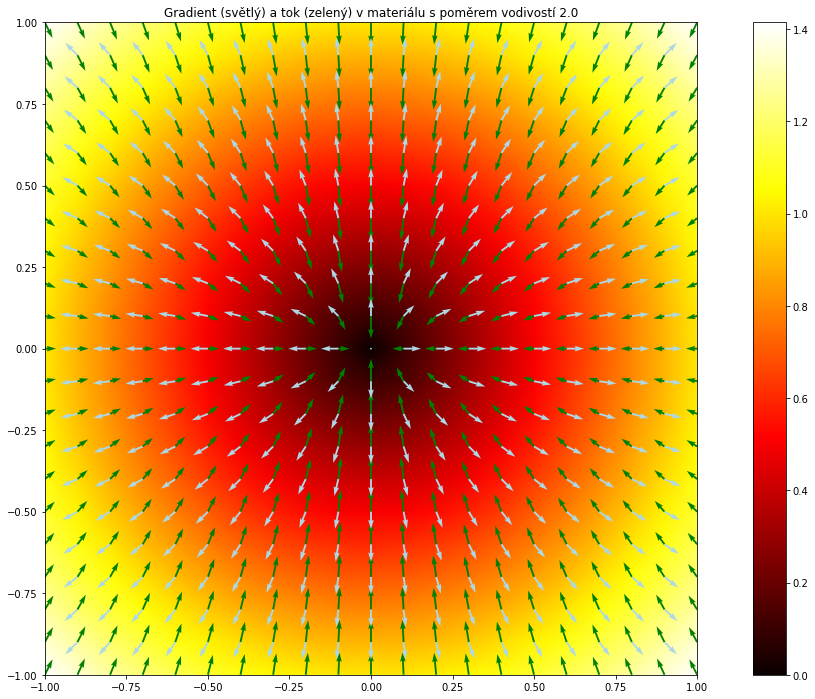

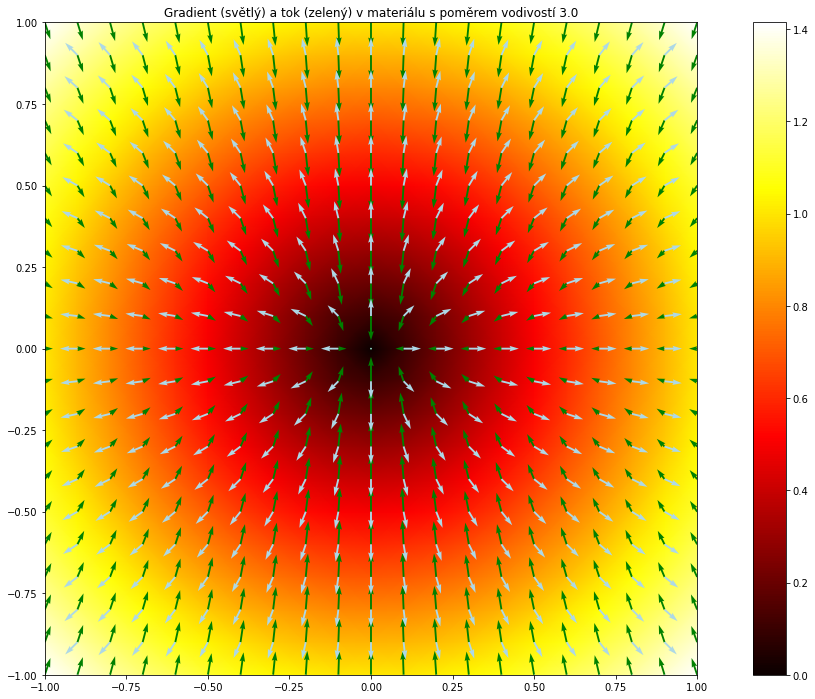

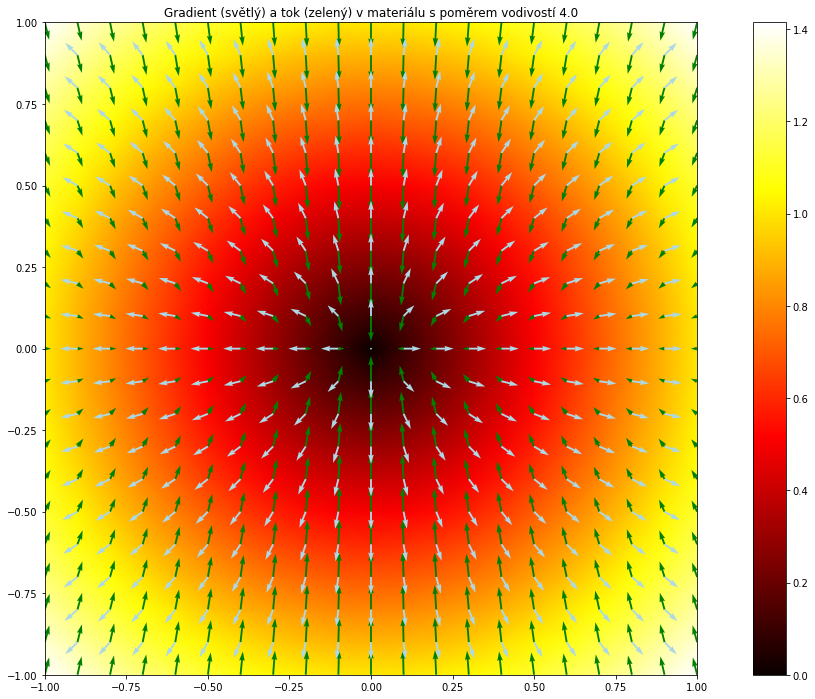

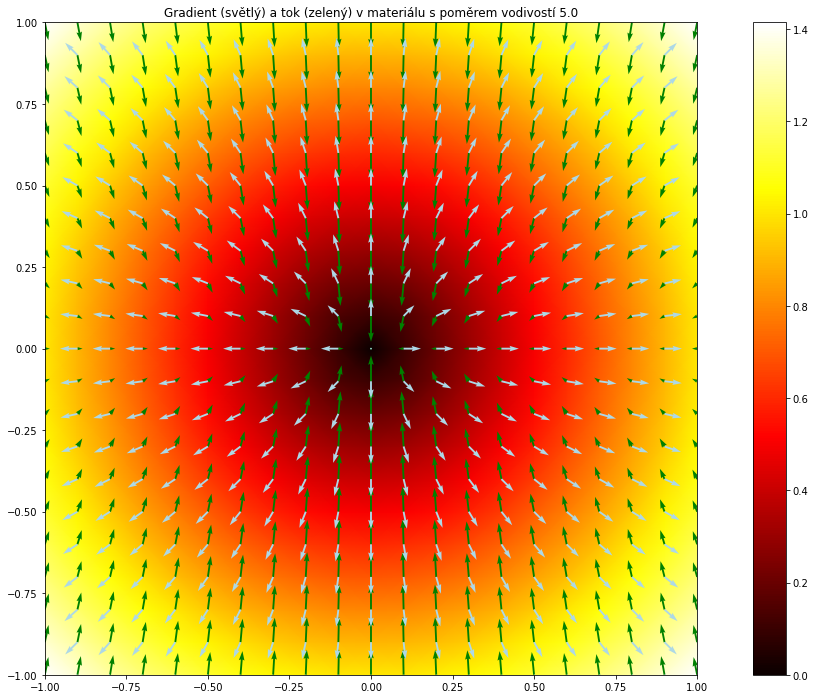

In [4]:
Dx = 1
for Dy in numpy.linspace(1,5,5):
  D = numpy.array([[Dx,0],[0,Dy]])
  tokx,toky = -D[0,0]*gradx - D[0,1]*grady, -D[1,0]*gradx - D[1,1]*grady, 
  fig, ax = plt.subplots(1,1,figsize=(20,12))   # inicializace grafiky
  plt.quiver(x, y, gradx, grady, color='blue') 
  output = plt.pcolormesh(x, y, z, cmap=cmap, shading='gouraud') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
  fig.colorbar(output)                           # barevný sloupec s hodnotami vedle grafu
  plt.quiver(x, y, tokx, toky, color='green')    # vykreslení toku
  plt.quiver(x, y, gradx, grady, color='lightblue')    # vykreslení gradientu
  plt.title("Gradient (světlý) a tok (zelený) v materiálu s poměrem vodivostí %s"%str(Dy))
  ax.set_aspect(1) 

None